## Gaussian Naive Bayes Classifier (GaussianNB)

Es un clasificador **probabilístico fundamentado en el teorema de Bayes** y algunas hipótesis simplificadoras adicionales.

**Este clasificador asume que la presencia o ausencia de una característica particular no está relacionada con la presencia o ausencia de cualquier otra característica, dada la clase variable.**

Por ejemplo, una fruta puede ser considerada como una manzana si es roja, redonda y de alrededor de 7 cm de diámetro. El clasificador de **Naive Bayes** considera que **cada una de estas características contribuye de manera independiente a la probabilidad** de que esta fruta sea una manzana, independientemente de la presencia o ausencia de las otras características.

**Aunque es un algoritmo que no necesita mucho tiempo para aprender, su principal desventaja es la asunción de atributos independientes. En la vida real, es casi imposible que obtengamos un conjunto de atributos que sean completamente independientes.**

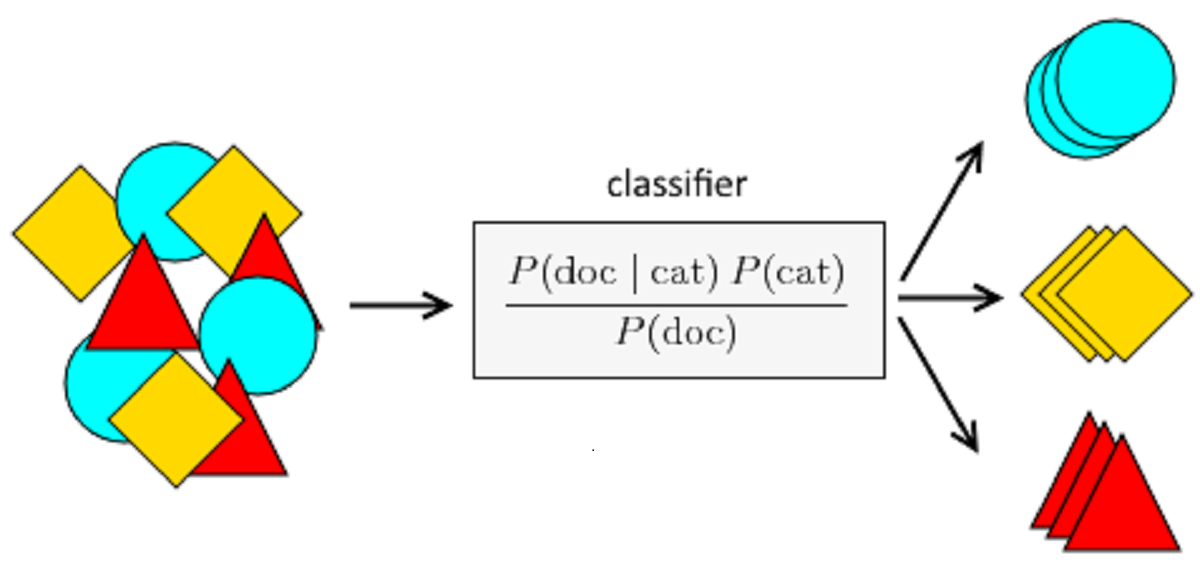

_**Documentacion:** https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html_

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

# Normalizacion
from sklearn.preprocessing import MinMaxScaler

# Train, Test
from sklearn.model_selection import train_test_split

# Metricas
from sklearn.metrics import jaccard_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [5]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [6]:
X = iris.data
y = iris.target

### Procesamiento

In [7]:
# Normalización de datos

x_scaler = MinMaxScaler()
X = x_scaler.fit_transform(X)

X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

### Train, Test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

X_train: (120, 4), y_train: (120,)
X_test: (30, 4),  y_test: (30,)


### Modelo

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
model = GaussianNB()

model.fit(X_train, y_train)

GaussianNB()

### Predicciones

In [34]:
yhat = model.predict(X_test)

yhat

array([0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 0, 0, 0, 1, 1, 2, 0, 2,
       1, 2, 2, 2, 1, 0, 2, 0])

In [35]:
print("Jaccard Index:", jaccard_score(y_test, yhat, average = "macro"))
print("Accuracy:"     , accuracy_score(y_test, yhat))
print("Precisión:"    , precision_score(y_test, yhat, average = "macro"))
print("Sensibilidad:" , recall_score(y_test, yhat, average = "macro"))
print("F1-score:"     , f1_score(y_test, yhat, average = "macro"))

Jaccard Index: 0.9363636363636364
Accuracy: 0.9666666666666667
Precisión: 0.9696969696969697
Sensibilidad: 0.9666666666666667
F1-score: 0.9665831244778613


### Confusion Matrix

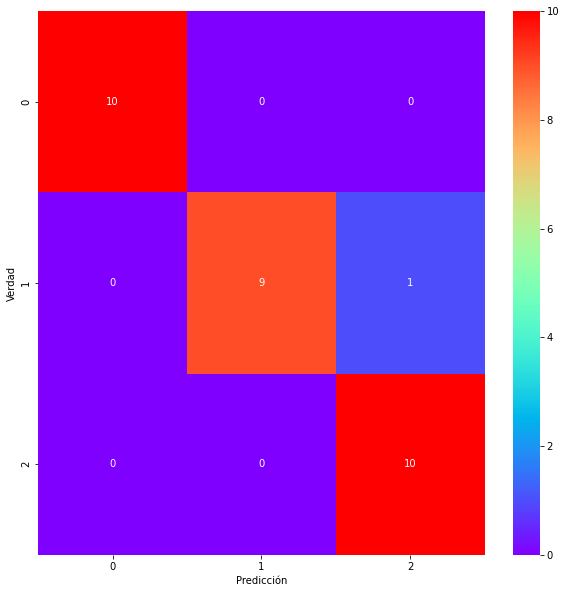

In [36]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test, yhat, labels = [0, 1, 2]), annot=True, cmap='rainbow')
plt.xlabel('Predicción')
plt.ylabel('Verdad');

### Classification Report

In [37]:
print(classification_report(y_test, yhat, digits = 3))

              precision    recall  f1-score   support

           0      1.000     1.000     1.000        10
           1      1.000     0.900     0.947        10
           2      0.909     1.000     0.952        10

    accuracy                          0.967        30
   macro avg      0.970     0.967     0.967        30
weighted avg      0.970     0.967     0.967        30



### Atributos del Modelo

In [38]:
# .class_prior_ muestra la probabilidad de pertenecer a cada clase definida por el modelo

model.class_prior_

array([0.33333333, 0.33333333, 0.33333333])

In [39]:
# .predict_proba muestra la probabilidad de pertenecer a cada clase

# model.predict_proba(X_test)

np.round(model.predict_proba(X_test), 3)

# Para ver los resultados redondeamos al tercer decimal

array([[1.   , 0.   , 0.   ],
       [0.   , 0.088, 0.912],
       [0.   , 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.648, 0.352],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.993, 0.007],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.954, 0.046],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.991, 0.009],
       [0.   , 0.164, 0.836],
       [1.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   ],
       [0.   , 0.994, 0.006],
       [0.   , 0.472, 0.528],
       [0.   , 0.   , 1.   ],
       [0.   , 0.059, 0.941],
       [0.   , 0.991, 0.009],
       [1.   , 0.   , 0.   ],
       [0.   , 0.001, 0.999],
       [1.   , 0.   , 0.   ]])

In [33]:
np.round(model.predict_log_proba(X_test))

array([[   0.,  -45.,  -57.],
       [-327.,   -2.,   -0.],
       [ -82.,   -0.,  -14.],
       [ -83.,   -0.,  -15.],
       [   0.,  -46.,  -58.],
       [-280.,   -0.,   -1.],
       [   0.,  -50.,  -60.],
       [   0.,  -38.,  -50.],
       [-402.,   -9.,   -0.],
       [-239.,   -0.,   -5.],
       [-578.,  -16.,   -0.],
       [-437.,  -17.,   -0.],
       [-526.,  -17.,   -0.],
       [-248.,   -0.,   -3.],
       [   0.,  -44.,  -56.],
       [   0.,  -45.,  -57.],
       [   0.,  -47.,  -55.],
       [-145.,   -0.,  -12.],
       [-261.,   -0.,   -5.],
       [-312.,   -2.,   -0.],
       [   0.,  -44.,  -55.],
       [-526.,  -22.,   -0.],
       [-247.,   -0.,   -5.],
       [-390.,   -1.,   -1.],
       [-491.,  -15.,   -0.],
       [-339.,   -3.,   -0.],
       [-231.,   -0.,   -5.],
       [  -0.,  -36.,  -47.],
       [-422.,   -7.,   -0.],
       [   0.,  -44.,  -56.]])

In [ ]:
################################################################################################################################

### Ejercicio 1: 
- Utiliza el dataset del titanic para practicar **`GaussianNB`**: